## Observations and Insights 

In [460]:
%matplotlib notebook

In [461]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [462]:
# Importing data files
mouse_metadata_path = "resources/Mouse_metadata.csv"
study_results_path = "resources/Study_results.csv"

In [463]:
# Read the mouse data and  results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
mouse_metadata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [464]:
#nRead the study datafile
study_results_df = pd.read_csv(study_results_path)
study_results_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [465]:
mouse_metadata_df.shape

(249, 5)

In [466]:
mouse_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [467]:
study_results_df.shape

(1893, 4)

In [468]:
study_results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [469]:
len(study_results_df['Mouse ID'].unique())

249

In [470]:
# Combine the data into a single dataset
merged_data_df = pd.merge(mouse_metadata_df, study_results_df, how="outer", on=["Mouse ID"])
merged_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [471]:
merged_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [472]:
merged_data_df.groupby(['Mouse ID', 'Timepoint']).sum()

Age_months  Weight (g)  Tumor Volume (mm3)  \
Mouse ID Timepoint                                               
a203     0                  20          23           45.000000   
         5                  20          23           48.508468   
         10                 20          23           51.852437   
         15                 20          23           52.777870   
         20                 20          23           55.173336   
...                        ...         ...                 ...   
z969     25                  9          30           63.145652   
         30                  9          30           65.841013   
         35                  9          30           69.176246   
         40                  9          30           70.314904   
         45                  9          30           73.867845   

                    Metastatic Sites  
Mouse ID Timepoint                    
a203     0                         0  
         5                         0  
         10                        1  
         15                        1  
         20                        1  
...                              ...  
z969     25                        2  
         30                        3  
         35                        4  
         40                        4  
         45                        4  

[1888 rows x 4 columns]

In [473]:
merged_data_df.duplicated(subset=['Mouse ID','Timepoint']).sum()

5

In [474]:
(~merged_data_df.duplicated(subset=['Mouse ID','Timepoint'])).sum()

1888

In [475]:
merged_data_df[merged_data_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [476]:
# duplicate rows
merged_data_df.loc[merged_data_df.duplicated(subset=['Mouse ID','Timepoint']), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [477]:
# dropping the duplicate rows
cleaned_df = merged_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [478]:
len(cleaned_df['Mouse ID'].unique())

249

In [479]:
cleaned_df.shape

(1883, 8)

In [480]:
cleaned_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1883 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1883 non-null   object 
 1   Drug Regimen        1883 non-null   object 
 2   Sex                 1883 non-null   object 
 3   Age_months          1883 non-null   int64  
 4   Weight (g)          1883 non-null   int64  
 5   Timepoint           1883 non-null   int64  
 6   Tumor Volume (mm3)  1883 non-null   float64
 7   Metastatic Sites    1883 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.4+ KB


In [481]:
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [482]:
cleaned_df[cleaned_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


## Summary Statistics

In [483]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.

In [484]:
# Group by mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.
stat_group_df = cleaned_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': [np.mean, np.median, np.var, np.std, st.sem]})
print(stat_group_df)

             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


In [485]:
# rename columns
stat_group_df.columns = ['Tumor_Volume_mean', 'Tumor_Volume_median', 'Tumor_Volume_var', 'Tumor_Volume_Std.Dev', 'Tumor_Volume_Std.Err']
print(stat_group_df)

              Tumor_Volume_mean  Tumor_Volume_median  Tumor_Volume_var  \
Drug Regimen                                                             
Capomulin             40.675741            41.557809         24.947764   
Ceftamin              52.591172            51.776157         39.290177   
Infubinol             52.884795            51.820584         43.128684   
Ketapril              55.235638            53.698743         68.553577   
Naftisol              54.331565            52.509285         66.173479   
Placebo               54.033581            52.288934         61.168083   
Propriva              52.458254            50.854632         44.053659   
Ramicane              40.216745            40.673236         23.486704   
Stelasyn              54.233149            52.431737         59.450562   
Zoniferol             53.236507            51.818479         48.533355   

              Tumor_Volume_Std.Dev  Tumor_Volume_Std.Err  
Drug Regimen                                        

## Bar and Pie Charts

In [486]:
# Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` 
#that shows  the number of total mice for each treatment regimen throughout the course of the study.


In [487]:
# Generating a bar plot using Matplotlib's `pyplot` 
count_df = cleaned_df.groupby(['Drug Regimen']).agg({'Mouse ID': ['count']})
print(count_df)

             Mouse ID
                count
Drug Regimen         
Capomulin         230
Ceftamin          178
Infubinol         178
Ketapril          188
Naftisol          186
Placebo           181
Propriva          151
Ramicane          228
Stelasyn          181
Zoniferol         182


In [488]:
# rename columns
count_df.columns = ['Mice_Count']
count_df

,Mice_Count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,151
Ramicane,228
Stelasyn,181


In [489]:
# Sorting the data in descending order
count_df = count_df.sort_values('Mice_Count', ascending=False)

In [490]:
count_df

,Mice_Count
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


In [491]:
# Create an array that contains the number of total mouse for  each treatment regimen throughout the course of the study.
mice_count = [230, 228, 188, 186, 182, 181, 181, 178, 178, 151]
x_axis = np.arange(len(mice_count))

<IPython.core.display.Javascript object>


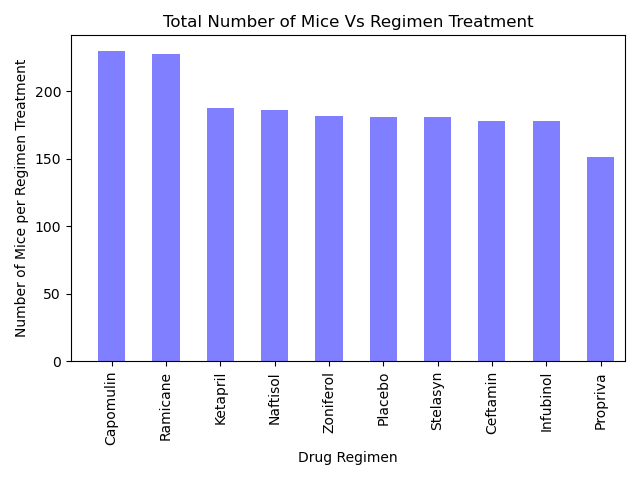

<BarContainer object of 10 artists>

In [492]:
# Telling matplotlib that we will be making a bar chart
# mouse_count is our y axis and x_axis is the length of x axis
# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, mice_count, color='b', alpha=0.5, align="center", width = 0.5)

In [494]:
# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"])

([<matplotlib.axis.XTick at 0x27bc891b9e8>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Ceftamin'),
  Text(8, 0, 'Infubinol'),
  Text(9, 0, 'Propriva')])

In [495]:
plt.tick_params(axis='x', labelrotation = 90)

In [496]:
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.55)

(-0.75, 9.45)

In [497]:
# Give our chart some labels and a tile
plt.title("Total Number of Mice Vs Regimen Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice per Regimen Treatment")

Text(38.097222222222214, 0.5, 'Number of Mice per Regimen Treatment')

In [498]:
plt.tight_layout()
plt.show()

In [499]:
# Generating identical bar plot using Pandas's `DataFrame.plot()`
# Generating a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There is a single bar per regimen



In [500]:
count_df

,Mice_Count
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


<IPython.core.display.Javascript object>


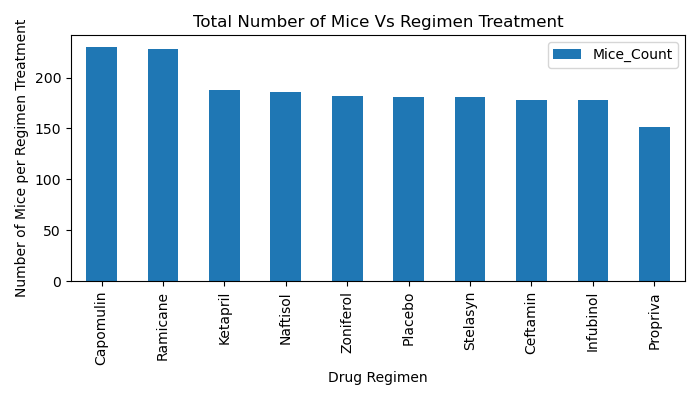

In [501]:
# Use DataFrame.plot() in order to create a bar chart of the data
count_df.plot(kind="bar", figsize=(7,4))

# Give our chart some labels and a tile
plt.title("Total Number of Mice Vs Regimen Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice per Regimen Treatment")
plt.show()
plt.tight_layout()

In [503]:
# Generate a pie plot showing the distribution of female versus male mice using 'Matplotlibs pyplot'
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [504]:
gender_group_df = cleaned_df.groupby(['Sex']).agg({'Sex': ['count']})

print(gender_group_df)

         Sex
       count
Sex         
Female   925
Male     958


In [505]:
# rename columns
gender_group_df.columns = ['Sex']
gender_group_df

,Sex
Sex,
Female,925
Male,958


In [506]:
%matplotlib notebook

In [507]:
# Import our dependencies
import matplotlib.pyplot as plt
import numpy as np

In [508]:
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
distribution = [925, 958]

# The colors of each section of the pie chart
colors = ["red", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0)

<IPython.core.display.Javascript object>


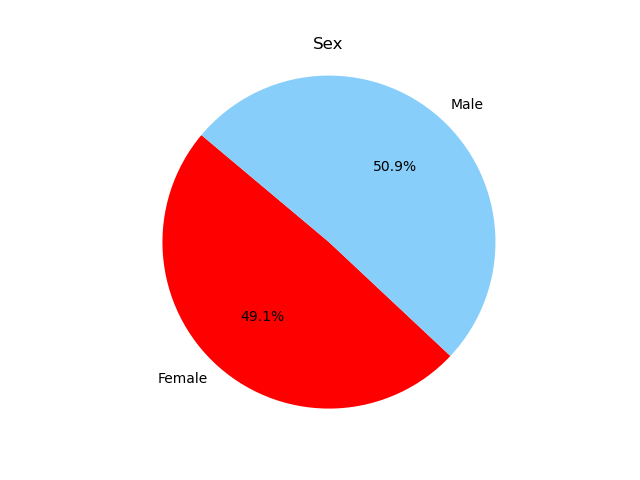

In [509]:
plt.title("Sex")

# autopct="%1.1f%%"
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(distribution, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.show()

In [511]:
#Pie plot using Pandas

<IPython.core.display.Javascript object>


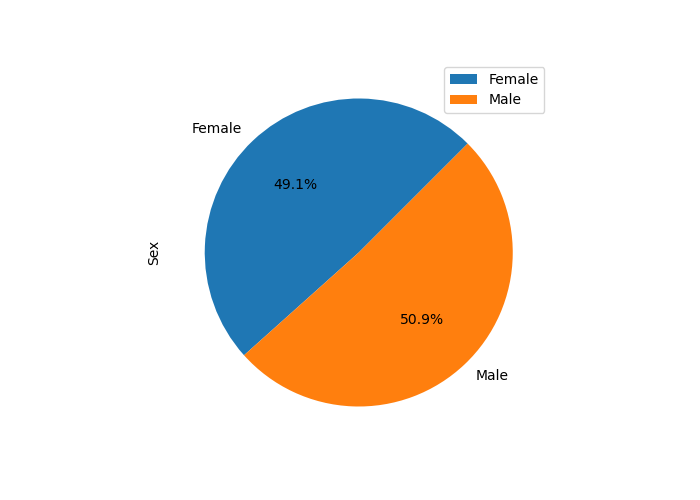

In [512]:
gender_group_df.plot(kind='pie', y='Sex', subplots=False, shadow = False, startangle=45,
figsize=(7,5), autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [513]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [514]:
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [515]:
# Collect a list of columns 
columns = [
    "Mouse ID",
    "Drug Regimen",
    "Sex",
    "Timepoint",
    "Tumor Volume (mm3)"
]


# Steps for "Capomulin" group:
# Filter the data so that only "Capomulin" in the 'Drug Regimen' are in a DataFrame
capomulin_group_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin", columns]
capomulin_group_df

,Mouse ID,Drug Regimen,Sex,Timepoint,Tumor Volume (mm3)
10,s185,Capomulin,Female,0,45.000000
11,s185,Capomulin,Female,5,43.878496
12,s185,Capomulin,Female,10,37.614948
13,s185,Capomulin,Female,15,38.177232
14,s185,Capomulin,Female,20,36.866876
...,...,...,...,...,...
440,i557,Capomulin,Female,45,47.685963
1452,r157,Capomulin,Male,0,45.000000
1453,r157,Capomulin,Male,5,45.597064
1454,r157,Capomulin,Male,10,46.059608


In [516]:
# Grouping by "Mouse ID" and getting max value of "Tumor Volume (mm3)" for each ID in 'Capomulin' regimen
capo_df1 = capomulin_group_df.groupby(["Mouse ID", "Tumor Volume (mm3)"]).agg({"Timepoint": ['max']})
capo_df1

Timepoint
                                  max
Mouse ID Tumor Volume (mm3)          
b128     37.967644                 35
         38.379726                 40
         38.982878                 45
         40.605335                 30
         42.731552                 20
...                               ...
y793     40.716428                 20
         41.019913                  5
         41.630010                 10
         42.283665                 15
         45.000000                  0

[230 rows x 1 columns]

In [517]:
# rename columns
capo_df1.columns = ['Timepoint']
capo_df1.head()

Timepoint
Mouse ID Tumor Volume (mm3)           
b128     37.967644                  35
         38.379726                  40
         38.982878                  45
         40.605335                  30
         42.731552                  20

In [518]:
# Retrieving the max 'Timepoint'for each mouse and the final volume of that mouse
capo_df1 = capo_df1.groupby('Mouse ID').Timepoint.idxmax().str[-1]
capo_df1.head()

Mouse ID
b128    38.982878
b742    38.939633
f966    30.485985
g288    37.074024
g316    40.159220
Name: Timepoint, dtype: float64

In [519]:
# Converting into a DataFrame
capo_df1 = pd.DataFrame(capo_df1)
capo_df1.head()

,Timepoint
Mouse ID,
b128,38.982878
b742,38.939633
f966,30.485985
g288,37.074024
g316,40.159220


In [520]:
# rename columns
capo_df1.columns = ['Final Tumor Volume (mm3)']
capo_df1.head()

,Final Tumor Volume (mm3)
Mouse ID,
b128,38.982878
b742,38.939633
f966,30.485985
g288,37.074024
g316,40.159220


In [521]:
# We need to sort the data to determine which could be outliers
# Sorting the data in ascending order
capo_df1 = capo_df1.sort_values('Final Tumor Volume (mm3)', ascending=True)
capo_df1.head()

,Final Tumor Volume (mm3)
Mouse ID,
s185,23.343598
m601,28.430964
x401,28.484033
f966,30.485985
u364,31.023923


In [522]:
# Assigning the dataframe column to a list
capo_list = capo_df1['Final Tumor Volume (mm3)'].tolist()
capo_list

[23.34359787,
 28.43096411,
 28.48403281,
 30.48598484,
 31.02392294,
 31.896238399999998,
 32.37735684,
 33.32909778,
 34.45529799,
 36.04104736,
 37.07402422,
 37.31184577,
 38.125164399999996,
 38.75326548,
 38.84687569,
 38.93963263,
 38.98287774,
 39.95234669,
 40.1592203,
 40.65812366,
 40.72857787,
 41.48300765,
 41.58152074,
 46.53920617,
 47.68596303]

In [523]:
# Steps for "Ramicane" group:
# Filter the data so that only "Ramicane" in the 'Drug Regimen' are in a DataFrame
ramicane_group_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane", columns]
ramicane_group_df.head()

,Mouse ID,Drug Regimen,Sex,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,Male,0,45.000000
1,k403,Ramicane,Male,5,38.825898
2,k403,Ramicane,Male,10,35.014271
3,k403,Ramicane,Male,15,34.223992
4,k403,Ramicane,Male,20,32.997729


In [524]:
# Grouping by "Mouse ID" and getting max value of "Tumor Volume (mm3)" for each ID in 'Ramicane' regimen
rami_df2 = ramicane_group_df.groupby(["Mouse ID", "Tumor Volume (mm3)"]).agg({"Timepoint": ['max']})
rami_df2

Timepoint
                                  max
Mouse ID Tumor Volume (mm3)          
a411     38.087373                 20
         38.407618                 45
         38.701438                 25
         39.130737                 30
         39.717236                 35
...                               ...
z578     38.504824                 35
         38.688516                 15
         42.188787                  5
         42.952118                 10
         45.000000                  0

[228 rows x 1 columns]

In [525]:
# rename columns
rami_df2.columns = ['Timepoint']
rami_df2.head()

Timepoint
Mouse ID Tumor Volume (mm3)           
a411     38.087373                  20
         38.407618                  45
         38.701438                  25
         39.130737                  30
         39.717236                  35

In [526]:
# Retrieving the max 'Timepoint'for each mouse and the final volume of that mouse
rami_df2 = rami_df2.groupby('Mouse ID').Timepoint.idxmax().str[-1]
rami_df2.head()

Mouse ID
a411    38.407618
a444    43.047543
a520    38.810366
a644    32.978522
c458    38.342008
Name: Timepoint, dtype: float64

In [527]:
# Converting into a DataFrame
rami_df2 = pd.DataFrame(df2)
rami_df2.head()

,Timepoint
Mouse ID,
a411,38.407618
a444,43.047543
a520,38.810366
a644,32.978522
c458,38.342008


In [528]:
# rename columns
rami_df2.columns = ['Final Tumor Volume (mm3)']
rami_df2.head()

,Final Tumor Volume (mm3)
Mouse ID,
a411,38.407618
a444,43.047543
a520,38.810366
a644,32.978522
c458,38.342008


In [529]:
# We need to sort the data to determine which could be outliers
# Sorting the data in ascending order
rami_df2 = rami_df2.sort_values('Final Tumor Volume (mm3)', ascending=True)
rami_df2.head()

,Final Tumor Volume (mm3)
Mouse ID,
k403,22.050126
g791,29.128472
s508,30.276232
m546,30.564625
z578,30.638696


In [530]:
# Assigning the dataframe column to a list
rami_list = rami_df2['Final Tumor Volume (mm3)'].tolist()
rami_list

[22.05012627,
 29.12847181,
 30.27623175,
 30.56462509,
 30.63869575,
 31.09533505,
 31.56046955,
 32.97852192,
 33.39765251,
 33.56240217,
 36.13485243,
 36.37451039,
 36.56165229,
 37.22565033,
 37.31123552,
 38.34200823,
 38.407618299999996,
 38.81036633,
 40.65900627,
 40.66771292,
 43.04754260000001,
 43.16637266,
 43.41938077,
 44.18345092,
 45.22086888]

In [531]:
# Steps for "Infubinol" group:
# Filter the data so that only "Infubinol" in the 'Drug Regimen' are in a DataFrame
infubinol_group_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol", columns]
infubinol_group_df.head()

,Mouse ID,Drug Regimen,Sex,Timepoint,Tumor Volume (mm3)
454,a203,Infubinol,Female,0,45.000000
455,a203,Infubinol,Female,5,48.508468
456,a203,Infubinol,Female,10,51.852437
457,a203,Infubinol,Female,15,52.777870
458,a203,Infubinol,Female,20,55.173336


In [532]:
# Grouping by "Mouse ID" and getting max value of "Tumor Volume (mm3)" for each ID in 'Infubinol' regimen
infu_df3 = infubinol_group_df.groupby(["Mouse ID", "Tumor Volume (mm3)"]).agg({"Timepoint": ['max']})
infu_df3.head()

Timepoint
                                  max
Mouse ID Tumor Volume (mm3)          
a203     45.000000                  0
         48.508468                  5
         51.852437                 10
         52.777870                 15
         55.173336                 20

In [533]:
# rename columns
infu_df3.columns = ['Timepoint']
infu_df3.head()

Timepoint
Mouse ID Tumor Volume (mm3)           
a203     45.000000                   0
         48.508468                   5
         51.852437                  10
         52.777870                  15
         55.173336                  20

In [534]:
# Retrieving the max 'Timepoint'for each mouse and the final volume of that mouse
infu_df3 = infu_df3.groupby('Mouse ID').Timepoint.idxmax().str[-1]
infu_df3.head()

Mouse ID
a203    67.973419
a251    65.525743
a577    57.031862
a685    66.083066
c139    72.226731
Name: Timepoint, dtype: float64

In [535]:
# Converting into a DataFrame
infu_df3 = pd.DataFrame(infu_df3)
infu_df3.head()

,Timepoint
Mouse ID,
a203,67.973419
a251,65.525743
a577,57.031862
a685,66.083066
c139,72.226731


In [536]:
# rename columns
infu_df3.columns = ['Final Tumor Volume (mm3)']
infu_df3.head()

,Final Tumor Volume (mm3)
Mouse ID,
a203,67.973419
a251,65.525743
a577,57.031862
a685,66.083066
c139,72.226731


In [537]:
# We need to sort the data to determine which could be outliers
# Sorting the data in ascending order
infu_df3 = infu_df3.sort_values('Final Tumor Volume (mm3)', ascending=True)
infu_df3.head()

,Final Tumor Volume (mm3)
Mouse ID,
c326,36.321346
o813,45.699331
v339,46.250112
m756,47.010364
w193,50.005138


In [538]:
# Assigning the dataframe column to a list
infu_list = infu_df3['Final Tumor Volume (mm3)'].tolist()
infu_list

[36.321345799999996,
 45.69933088,
 46.25011212,
 47.01036401,
 50.00513807,
 51.54243058,
 54.04860769,
 54.65654872,
 55.62942846,
 55.65068132,
 57.03186187,
 58.26844248,
 60.16518046,
 60.91876652,
 60.96971133,
 62.11727887,
 62.43540402,
 62.75445141,
 65.52574285,
 66.08306589,
 66.19691151,
 67.28962147,
 67.68556862,
 67.97341878,
 72.2267309]

In [539]:
# Steps for "Ceftamin" group:
# Filter the data so that only "Ceftamin" in the 'Drug Regimen' are in a DataFrame
ceftamin_group_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin", columns]
ceftamin_group_df.head()

,Mouse ID,Drug Regimen,Sex,Timepoint,Tumor Volume (mm3)
484,a275,Ceftamin,Female,0,45.000000
485,a275,Ceftamin,Female,5,46.795257
486,a275,Ceftamin,Female,10,47.371343
487,a275,Ceftamin,Female,15,49.734404
488,a275,Ceftamin,Female,20,50.513437


In [540]:
# Grouping by "Mouse ID" and getting max value of "Tumor Volume (mm3)" for each ID in 'Ceftamin' regimen
ceft_df4 = ceftamin_group_df.groupby(["Mouse ID", "Tumor Volume (mm3)"]).agg({"Timepoint": ['max']})
ceft_df4.head()

Timepoint
                                  max
Mouse ID Tumor Volume (mm3)          
a275     45.000000                  0
         46.795257                  5
         47.371343                 10
         49.734404                 15
         50.513437                 20

In [541]:
# rename columns
ceft_df4.columns = ['Timepoint']
ceft_df4.head()

Timepoint
Mouse ID Tumor Volume (mm3)           
a275     45.000000                   0
         46.795257                   5
         47.371343                  10
         49.734404                  15
         50.513437                  20

In [542]:
# Retrieving the max 'Timepoint'for each mouse and the final volume of that mouse
ceft_df4 = df4.groupby('Mouse ID').Timepoint.idxmax().str[-1]
ceft_df4.head()

Mouse ID
a275    62.999356
b447    45.000000
b487    56.057749
b759    55.742829
f436    48.722078
Name: Timepoint, dtype: float64

In [543]:
# Converting into a DataFrame
ceft_df4 = pd.DataFrame(ceft_df4)
ceft_df4.head()

,Timepoint
Mouse ID,
a275,62.999356
b447,45.000000
b487,56.057749
b759,55.742829
f436,48.722078


In [544]:
# rename columns
ceft_df4.columns = ['Final Tumor Volume (mm3)']
ceft_df4.head()

,Final Tumor Volume (mm3)
Mouse ID,
a275,62.999356
b447,45.000000
b487,56.057749
b759,55.742829
f436,48.722078


In [545]:
# We need to sort the data to determine which could be outliers
# Sorting the data in ascending order
ceft_df4 = ceft_df4.sort_values('Final Tumor Volume (mm3)', ascending=True)
ceft_df4.head()

,Final Tumor Volume (mm3)
Mouse ID,
x226,45.000000
b447,45.000000
u153,45.000000
t573,45.000000
l558,46.784535


In [546]:
ceft_df4['Final Tumor Volume (mm3)']

Mouse ID
x226    45.000000
b447    45.000000
u153    45.000000
t573    45.000000
l558    46.784535
h531    47.784682
f436    48.722078
u149    52.925348
b759    55.742829
b487    56.057749
l490    57.918381
o287    59.741901
l661    59.851956
x822    61.386660
p438    61.433892
j296    61.849023
a275    62.999356
q483    64.192341
l733    64.299830
x581    64.634949
y865    64.729837
w151    67.527482
l471    67.748662
y769    68.594745
k210    68.923185
Name: Final Tumor Volume (mm3), dtype: float64

In [547]:
# Assigning the dataframe column to a list
ceft_list = ceft_df4['Final Tumor Volume (mm3)'].tolist()
ceft_list

[45.0,
 45.0,
 45.0,
 45.0,
 46.78453491,
 47.784681799999994,
 48.72207785,
 52.92534846,
 55.74282869,
 56.05774909,
 57.91838132,
 59.74190064,
 59.85195552,
 61.38666032,
 61.43389223,
 61.84902336,
 62.99935619,
 64.19234114,
 64.29983003,
 64.63494887,
 64.72983655,
 67.52748237,
 67.74866174,
 68.59474498,
 68.92318457]

In [548]:
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.
# Determine if there are any potential outliers in the 'Final Tumor Volume (mm3)' data

#lists of final tumor volume for all four regimen
four_dataset = [capo_list, rami_list, infu_list, ceft_list] 



In [549]:

# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

#--------------------------------------------------------
# final tumor volume data for Capomulin regimen---capo_list
#--------------------------------------------------------

np.quantile(capo_list, [.25, .5, .75])
lowerq = np.quantile(capo_list, .25)
upperq = np.quantile(capo_list, .75)
iqr = upperq-lowerq

print("Q1 quantile of final tumor volume data for Capomulin regimen is: ", np.quantile(capo_list, .25))
print("Q3 quantile of final tumor volume data for Capomulin regimen is: ", np.quantile(capo_list, .75))

print(f"The interquartile range of final tumor volume data for Capomulin regimen is: {iqr}")
print("The median of final tumor volume data for Capomulin regimen is: ", np.quantile(capo_list, .50))

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")




Q1 quantile of final tumor volume data for Capomulin regimen is:  32.37735684
Q3 quantile of final tumor volume data for Capomulin regimen is:  40.1592203
The interquartile range of final tumor volume data for Capomulin regimen is: 7.781863460000004
The median of final tumor volume data for Capomulin regimen is:  38.125164399999996
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [550]:

# Determine if there are any potential outliers in the 'Final Tumor Volume (mm3)' data for Capomulin regimen

outlier_capo_df1 = capo_df1.loc[(capo_df1['Final Tumor Volume (mm3)'] < lower_bound) | (capo_df1['Final Tumor Volume (mm3)'] > upper_bound)]
outlier_capo_df1.head()



,Final Tumor Volume (mm3)
Mouse ID,


In [551]:

print("There is no data point detected in final tumor volume data for Capomulin regimen\nbelow the lower_bound or above the upper_bound.") 


There is no data point detected in final tumor volume data for Capomulin regimen
below the lower_bound or above the upper_bound.


In [552]:

# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

#-------------------------------------------------------
# final tumor volume data for Ramicane regimen----rami__list
#-------------------------------------------------------

np.quantile(rami_list, [.25, .5, .75])
lowerq = np.quantile(rami_list, .25)
upperq = np.quantile(rami_list, .75)
iqr = upperq-lowerq

print("Q1 quantile of final tumor volume data for Ramicane regimen is: ", np.quantile(rami_list, .25))
print("Q3 quantile of final tumor volume data for Ramicane regimen is: ", np.quantile(rami_list, .75))

print(f"The interquartile range of final tumor volume data for Ramicane regimen is: {iqr}")
print("The median of final tumor volume data for Ramicane regimen is: ", np.quantile(rami_list, .50))

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


Q1 quantile of final tumor volume data for Ramicane regimen is:  31.56046955
Q3 quantile of final tumor volume data for Ramicane regimen is:  40.65900627
The interquartile range of final tumor volume data for Ramicane regimen is: 9.098536719999998
The median of final tumor volume data for Ramicane regimen is:  36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [553]:

# Determine if there are any potential outliers in the 'Final Tumor Volume (mm3)' data for Ramicane regimen

outlier_rami_df2 = rami_df2.loc[(rami_df2['Final Tumor Volume (mm3)'] < lower_bound) | (rami_df2['Final Tumor Volume (mm3)'] > upper_bound)]
outlier_rami_df2.head()



,Final Tumor Volume (mm3)
Mouse ID,


In [554]:

print("There is no data point detected in final tumor volume data for Ramicane regimen\nbelow the lower_bound or above the upper_bound.") 


There is no data point detected in final tumor volume data for Ramicane regimen
below the lower_bound or above the upper_bound.


In [555]:

# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

#-------------------------------------------------------
# final tumor volume data for Infubinol regimen----infu_list
#-------------------------------------------------------

np.quantile(infu_list, [.25, .5, .75])
lowerq = np.quantile(infu_list, .25)
upperq = np.quantile(infu_list, .75)
iqr = upperq-lowerq

print("Q1 quantile of final tumor volume data for Infubinol regimen is: ", np.quantile(infu_list, .25))
print("Q3 quantile of final tumor volume data for Infubinol regimen is: ", np.quantile(infu_list, .75))

print(f"The interquartile range of final tumor volume data for Infubinol regimen is: {iqr}")
print("The median of final tumor volume data for Infubinol regimen is: ", np.quantile(infu_list, .50))

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


Q1 quantile of final tumor volume data for Infubinol regimen is:  54.04860769
Q3 quantile of final tumor volume data for Infubinol regimen is:  65.52574285
The interquartile range of final tumor volume data for Infubinol regimen is: 11.477135160000003
The median of final tumor volume data for Infubinol regimen is:  60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [556]:

# Determine if there are any potential outliers in the 'Final Tumor Volume (mm3)' data for Infubinol regimen

outlier_infu_df3 = infu_df3.loc[(infu_df3['Final Tumor Volume (mm3)'] < lower_bound) | (infu_df3['Final Tumor Volume (mm3)'] > upper_bound)]
outlier_infu_df3.head()


,Final Tumor Volume (mm3)
Mouse ID,
c326,36.321346


In [557]:

print("There is one data point detected in final tumor volume data for Infubinol  regimen\nbelow the lower_bound or above the upper_bound.") 


There is one data point detected in final tumor volume data for Infubinol  regimen
below the lower_bound or above the upper_bound.


In [558]:

# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

#-------------------------------------------------------
# final tumor volume data for Ceftamin regimen----ceft_list
#-------------------------------------------------------

np.quantile(ceft_list, [.25, .5, .75])
lowerq = np.quantile(ceft_list, .25)
upperq = np.quantile(ceft_list, .75)
iqr = upperq-lowerq

print("Q1 quantile of final tumor volume data for Ceftamin regimen is: ", np.quantile(ceft_list, .25))
print("Q3 quantile of final tumor volume data for Ceftamin regimen is: ", np.quantile(ceft_list, .75))

print(f"The interquartile range of final tumor volume data for Ceftamin regimen is: {iqr}")
print("The median of final tumor volume data for Ceftamin regimen is: ", np.quantile(ceft_list, .50))

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


Q1 quantile of final tumor volume data for Ceftamin regimen is:  48.72207785
Q3 quantile of final tumor volume data for Ceftamin regimen is:  64.29983003
The interquartile range of final tumor volume data for Ceftamin regimen is: 15.577752179999997
The median of final tumor volume data for Ceftamin regimen is:  59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [559]:

# Determine if there are any potential outliers in the 'Final Tumor Volume (mm3)' data for Ceftamin regimen

outlier_ceft_df4 = ceft_df4.loc[(ceft_df4['Final Tumor Volume (mm3)'] < lower_bound) | (ceft_df4['Final Tumor Volume (mm3)'] > upper_bound)]
outlier_ceft_df4.head()


,Final Tumor Volume (mm3)
Mouse ID,


In [560]:

print("There is no data point detected in final tumor volume data for Ramicane regimen\nbelow the lower_bound or above the upper_bound.") 


There is no data point detected in final tumor volume data for Ramicane regimen
below the lower_bound or above the upper_bound.


In [561]:

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.


In [562]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


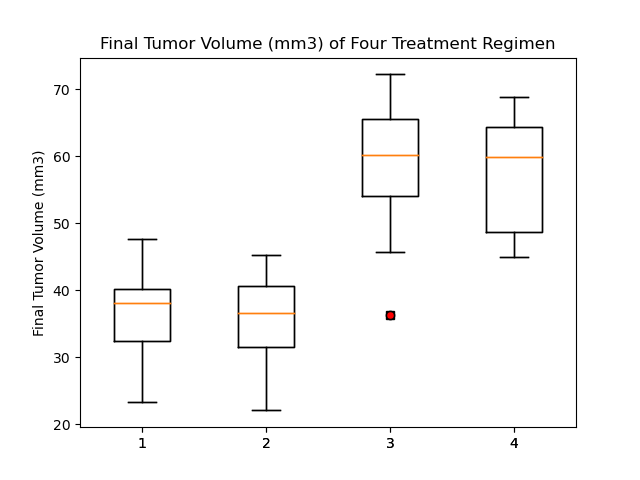

In [563]:
four_dataset = [capo_list, rami_list, infu_list, ceft_list]

red_square = dict(markerfacecolor='r', marker='s')

fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume (mm3) of Four Treatment Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.boxplot(four_dataset, flierprops=red_square)
ax.boxplot(four_dataset)
plt.show()

## Line and Scatter Plots

In [564]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

In [565]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt

In [566]:
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [567]:
# Collect a list of columns 
columns = [
    "Mouse ID",
    "Timepoint",
    "Tumor Volume (mm3)"
]


# Filter the data so that only "Capomulin" in the 'Drug Regimen' are in a DataFrame
capomulinl509_df = cleaned_df.loc[(cleaned_df["Drug Regimen"] == "Capomulin") & (cleaned_df["Mouse ID"] == "l509"), columns]
capomulinl509_df

,Mouse ID,Timepoint,Tumor Volume (mm3)
371,l509,0,45.000000
372,l509,5,45.851193
373,l509,10,46.759074
374,l509,15,47.488599
375,l509,20,48.070452
376,l509,25,44.006257
377,l509,30,44.708055
378,l509,35,40.207289
379,l509,40,40.770813
380,l509,45,41.483008


<IPython.core.display.Javascript object>


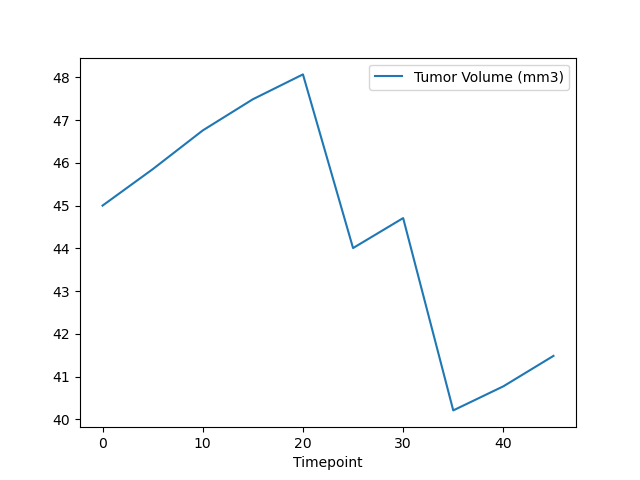

In [568]:
lines = capomulinl509_df.plot.line(x='Timepoint', y='Tumor Volume (mm3)')

In [569]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [570]:
# Collect a list of columns 
columns = [
    "Mouse ID",
    "Drug Regimen",
    "Weight (g)",
    "Timepoint",
    "Tumor Volume (mm3)"
]

# Steps for "Capomulin" group:
# Filter the data so that only "Capomulin" in the 'Drug Regimen' are in a DataFrame
capomulin_df1 = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin", columns]
capomulin_df1.head()

,Mouse ID,Drug Regimen,Weight (g),Timepoint,Tumor Volume (mm3)
10,s185,Capomulin,17,0,45.000000
11,s185,Capomulin,17,5,43.878496
12,s185,Capomulin,17,10,37.614948
13,s185,Capomulin,17,15,38.177232
14,s185,Capomulin,17,20,36.866876


In [571]:
avg_volume_df = capomulin_df1.groupby(["Mouse ID", "Weight (g)"]).agg({"Tumor Volume (mm3)": ['mean']})
avg_volume_df.head()

,,Tumor Volume (mm3)
,,mean
Mouse ID,Weight (g),
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


In [572]:
# rename columns
avg_volume_df.columns = ['Average Tumor Volume (mm3)']
avg_volume_df.head()

,,Average Tumor Volume (mm3)
Mouse ID,Weight (g),
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


In [573]:
# Resetting the index so that we are able to retieve the weight column
avg_volume_df = avg_volume_df.reset_index()

In [574]:
#avg_volume_df['Weight (g)'] 

In [575]:
%matplotlib notebook

In [576]:
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


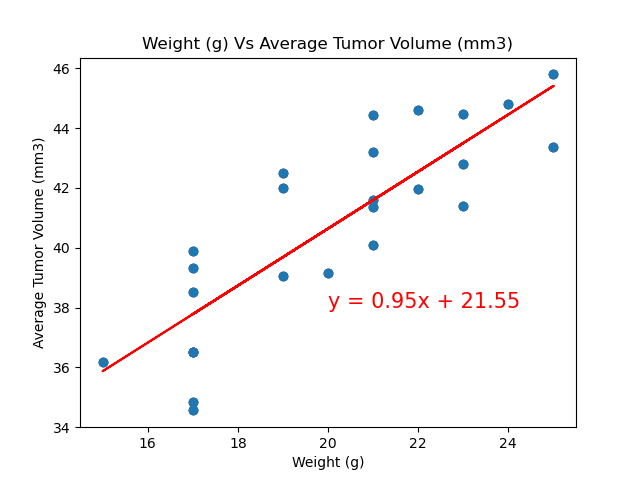

In [577]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

plt.scatter(avg_volume_df['Weight (g)'], avg_volume_df['Average Tumor Volume (mm3)'], marker="o", facecolors="red", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Weight (g) Vs Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


plt.show()


## Correlation and Regression

In [578]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Observations and Insights

In [579]:
# Calculate the correlation coefficient between mouse weight and average tumor volume for the Capomulin treatment


correlation = st.pearsonr(avg_volume_df['Weight (g)'], avg_volume_df['Average Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [580]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [581]:
# Calculate the linear regression model between mouse weight 
# and average tumor volume for the Capomulin treatment

In [582]:
# Add the linear regression equation and line to plot
# Plot the linear regression model on top of the previous scatter plot.


x_values = avg_volume_df['Weight (g)']
y_values = avg_volume_df['Average Tumor Volume (mm3)']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")

# Create a title, x label, and y label for our chart
plt.title("Weight (g) Vs Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.7088568047708717
